In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [20]:
data = np.genfromtxt('/Users/sergei.samoilov/Documents/учеба/Учеба_3.2/ООАП/Adapter/data/PoisonData.csv', delimiter=',', skip_header=0)

In [21]:
n, Size = data.shape

train = data[:int(n*0.8), :]

test = data[int(n*0.8):, :]
test = test[test[:, 0].argsort()]

train_X = train[:, 1:]
train_Y = train[:, 0]

test_X = test[:, 1:]
test_Y = test[:, 0]

In [22]:
linear_model = LinearRegression()
linear_model.fit(train_X, train_Y)

LinearRegression()

In [23]:
log_transformer = FunctionTransformer(
    func=np.log,           
    inverse_func=np.exp,
    validate=True   
)

pipeline = Pipeline([
    ('log_transform', log_transformer),
    ('model', LinearRegression())
])

pipeline.fit(train_X, train_Y)

Pipeline(steps=[('log_transform',
                 FunctionTransformer(func=<ufunc 'log'>,
                                     inverse_func=<ufunc 'exp'>,
                                     validate=True)),
                ('model', LinearRegression())])

In [24]:
linear_model_predictions = linear_model.predict(test_X)

In [25]:
pipeline_predictions = pipeline.predict(test_X)

In [26]:
mape = np.mean(np.abs((test_Y - linear_model_predictions) / test_Y)) * 100
r2 = r2_score(test_Y, linear_model_predictions)
mse = mean_squared_error(test_Y, linear_model_predictions)
rmse = np.sqrt(mean_squared_error(test_Y, linear_model_predictions))
print("\n linear_model_predictions RESULT")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Percentage Error: {mape}%')


mape = np.mean(np.abs((test_Y - pipeline_predictions) / test_Y)) * 100
r2 = r2_score(test_Y, pipeline_predictions)
mse = mean_squared_error(test_Y, pipeline_predictions)
rmse = np.sqrt(mean_squared_error(test_Y, pipeline_predictions))
print("\n pipeline_predictions RESULT")
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Percentage Error: {mape}%')


 linear_model_predictions RESULT
Mean Squared Error: 288447106.96778125
Root Mean Squared Error: 16983.730655182368
R² Score: -13.269718626897628
Mean Absolute Percentage Error: 611.6090243135044%

 pipeline_predictions RESULT
Mean Squared Error: 18620881.208108563
Root Mean Squared Error: 4315.191908607144
R² Score: 0.07880949745745103
Mean Absolute Percentage Error: 97.73752565282028%


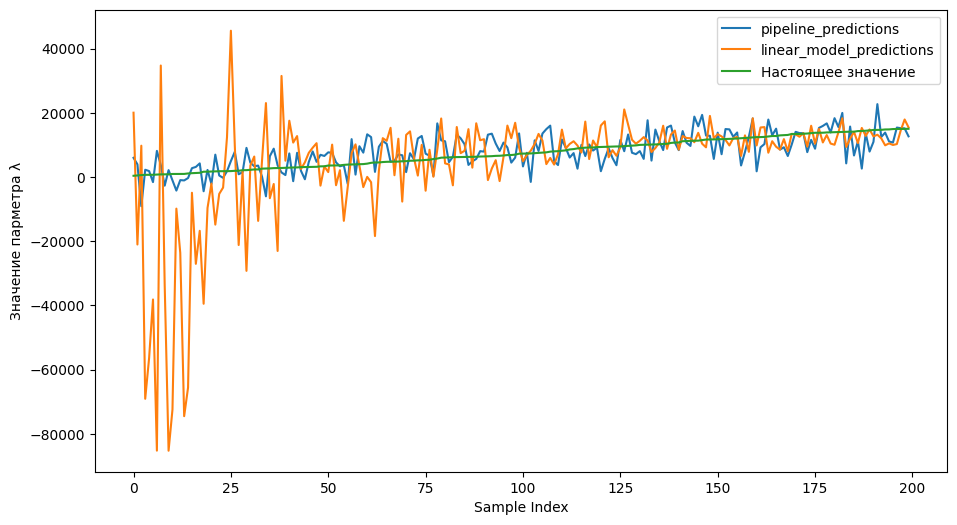

In [27]:
plt.figure(figsize=(11, 6))

plt.plot(pipeline_predictions, label='pipeline_predictions')
plt.plot(linear_model_predictions, label='linear_model_predictions')
plt.plot(test_Y, label='Настоящее значение')
plt.xlabel('Sample Index')
plt.ylabel('Значение парметра λ')
plt.legend()
plt.show()
